# Beleg 1 : Univariate Lineare Regression

In [159]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

Globale Variablen: 

In [160]:
#Data
dataSize = 150
theta0Data = 2
theta1Data = 3

#Trainings
#iterations = 100
#lernrate = 0.0001
#theta_0 = 0
#theta_1 = 0

Erzeugung Daten:

<function matplotlib.pyplot.show>

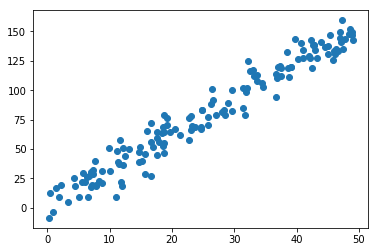

In [161]:
#unabhängige Variable
x = np.random.uniform(0, 50, dataSize) 
#abhängige Variable
y = (theta0Data + np.random.normal(0, 10, dataSize) * 1) + (theta1Data * (x + np.random.uniform(-1, 1, dataSize)))

plt.scatter(x,y)
plt.show

Hypothese:

In [162]:
def linear_hypothesis(theta_0, theta_1):
    def h(x):
        y = theta_0 + theta_1*x
        return y
    return h

KostenFunktion:

In [163]:
def cost_function(hypothesis, x, y):
    def j(theta_0, theta_1):
        hypothesis = linear_hypothesis(theta_0, theta_1)
        cost = 1/(2*len(x))*((hypothesis(x) - y)**2).sum()
        return cost
    return j

Contourplot Kostenfunktion:

Text(0.5,1,'Kostenfunktion')

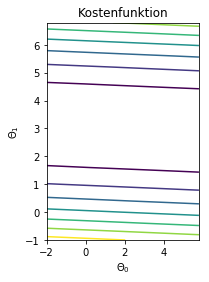

In [164]:
ran = 4.
a=2
b=3

t0 = np.arange(a - ran, a + ran, ran * 0.05)
t1 = np.arange(b - ran, b + ran, ran * 0.05)


C = np.zeros([len(t0),len(t1)])
c = cost_function(linear_hypothesis, x, y)

for i, t_0 in enumerate(t0):
    for j, t_1 in enumerate(t1):
        C[j][i] = c(t_0, t_1)
T0, T1 = np.meshgrid(t0, t1)

plt.subplot(121)
plt.contour(T0, T1, C)
plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
plt.title('Kostenfunktion')

In [165]:
def compute_new_theta (x,y,theta_0,theta_1,alpha):
#grad 0 grad1 unbenennen
    temp0 = 1/len(x) * (theta_0 + theta_1 * x - y).sum()
    temp1 = 1/len(x) * ((theta_0 + theta_1 * x - y) * x).sum()

    theta_0 -= alpha*  temp0
    theta_1 -= alpha*  temp1

    return theta_0, theta_1


In [168]:
#hypothesiss=linear_hypothesis(theta_0,theta_1)
#plt.plot([0,50],[hypothesiss(0),hypothesiss(50)], color="r", linewidth=3)



def gradient_descent(theta_0, theta_1, iterations, alpha):
    
    costs = np.zeros([])
    
    for i in range (iterations):
        
        newTheta = compute_new_theta (x,y, theta_0, theta_1, alpha)
        theta_0 = newTheta[0]
        theta_1 = newTheta[1]
        hypothesis = linear_hypothesis(theta_0,theta_1)
        j = cost_function(hypothesis, x,y)
        costs = np.append(costs, j(theta_0, theta_1))

    plt.plot([0,50],[hypothesis(0),hypothesis(50)], color="r")


    plt.scatter(x, y, color='b', s=20)
    plt.show()
    plt.plot(costs[1:])
    plt.xlabel('Iteration')
    plt.ylabel('Kosten')
    plt.show()
    return costs







Test verschiedene Daten:

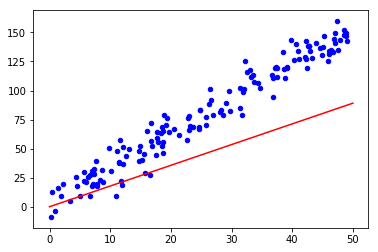

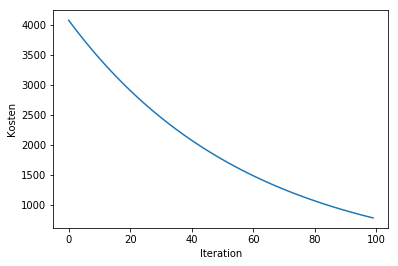

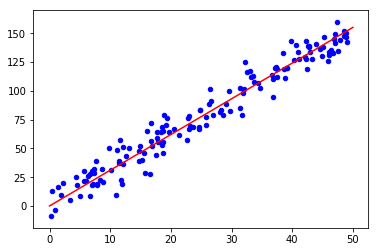

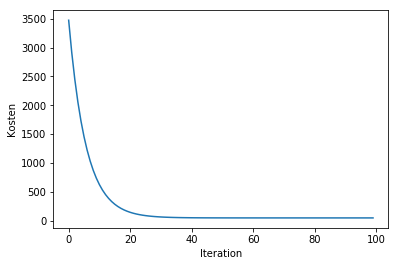

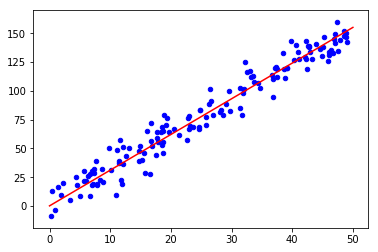

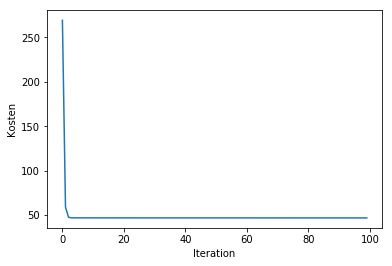

In [169]:
costs = gradient_descent(0.0, 0.0, 100, 0.00001)
costs2 = gradient_descent(0.0, 0.0, 100, 0.0001)
costs3 = gradient_descent(0.0, 0.0, 100, 0.0009)










